# Práctica Machine Learning

## 0 - IMPORTACION DE LIBRERIAS, FICHERO AIRBNB Y PREPARACION DE LOS DATASET EN FICHEROS

#### 0.0 - Importación de las librerías

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("Solarize_Light2")

import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#### 0.1 - Carga de datos 

In [2]:
!wget -O "Data/airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"
df = pd.read_csv('Data/airbnb-listings.csv', sep = ';')
!rm 'Data/airbnb-listings.csv'

--2021-12-27 08:16:27--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolviendo public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Conectando con public.opendatasoft.com (public.opendatasoft.com)[34.248.20.69]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [application/csv]
Guardando como: “Data/airbnb-listings.csv”

Data/airbnb-listing     [<=>                 ]  54,31M  3,18MB/s    en 19s     

2021-12-27 08:16:47 (2,90 MB/s) - “Data/airbnb-listings.csv” guardado [56950929]



#### 0.2 Dividimos el dataset en train y test

In [3]:
train, test = train_test_split(df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

train.to_csv('Data/train.csv', sep=';', decimal='.', index=False)
test.to_csv('Data/test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (11200, 89)
Dimensiones del dataset de test: (2801, 89)


#### 0.3 Cargamos el dataset para TRAINING 

In [4]:
df_train = pd.read_csv('Data/train.csv', sep=';', decimal='.')
df_train.head(1)

/media/jose/Repositorio/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,17266729,https://www.airbnb.com/rooms/17266729,20170407214119,2017-04-08,Madrideasy,"Apartamento luminoso, dormitorio privado para ...",NaN,"Apartamento luminoso, dormitorio privado para ...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1,NaN,"40.4028919826841,-3.6314734021675448","Host Has Profile Pic,Is Location Exact,Require..."


In [5]:
df_train.shape

(11200, 89)

In [6]:
df_train.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

## 1.1 - LIMPIEZA DE LOS DATOS DEL DATASET DE TRAINING

#### 1.1 - LIMPIEZA DE COLUMNAS

In [7]:
columnas = ['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview']
df_train.loc[:,columnas].head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview
0,17266729,https://www.airbnb.com/rooms/17266729,20170407214119,2017-04-08,Madrideasy,"Apartamento luminoso, dormitorio privado para ...",NaN,"Apartamento luminoso, dormitorio privado para ...",none,NaN
1,11705453,https://www.airbnb.com/rooms/11705453,20170407214119,2017-04-08,3 camas disponibles,Hola somos un grupo de amigos y nos sobran 3 c...,NaN,Hola somos un grupo de amigos y nos sobran 3 c...,none,NaN
2,12085078,https://www.airbnb.com/rooms/12085078,20170407214119,2017-04-08,Cozy room in beautiful apartment /Habitación d...,The neighborhood: perfectly located in the cen...,"Our apartment is beautiful and spacious, perfe...",The neighborhood: perfectly located in the cen...,none,NaN
3,15669581,https://www.airbnb.com/rooms/15669581,20170407214119,2017-04-08,"Gran Vía,Calle del Barco","Apartamento ubicado en la calle del barco 23, ...",NaN,"Apartamento ubicado en la calle del barco 23, ...",none,NaN
4,17677054,https://www.airbnb.com/rooms/17677054,20170407214119,2017-04-08,DOUBLE ROOM MADRID CLOSE TO METRO SIMANCAS,"Room in Madrid with bed of marriage, next to m...",Very quiet area. Excellent location along metr...,"Room in Madrid with bed of marriage, next to m...",none,The neighborhood is a quiet area which is very...


In [8]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11200 entries, 0 to 11199
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     11200 non-null  int64 
 1   Listing Url            11200 non-null  object
 2   Scrape ID              11200 non-null  int64 
 3   Last Scraped           11200 non-null  object
 4   Name                   11200 non-null  object
 5   Summary                10755 non-null  object
 6   Space                  8234 non-null   object
 7   Description            11196 non-null  object
 8   Experiences Offered    11200 non-null  object
 9   Neighborhood Overview  6897 non-null   object
dtypes: int64(2), object(8)
memory usage: 875.1+ KB


* no considero ninguna interesante pero mantendremos ID para la parte de Deep learnig

In [9]:
columnas = ['Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url']
df_train.loc[:,columnas].head()

,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url
0,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/8c5a3d48-a...,https://a0.muscache.com/im/pictures/8c5a3d48-a...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/8c5a3d48-a...
1,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/1025a532-5...,https://a0.muscache.com/im/pictures/1025a532-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/1025a532-5...
2,"Nothing else to note, come check out our apart...",NaN,Our guests will have access to the entire apar...,My roommate and I will be available to answer ...,"No pets are allowed. Other than that, not man...",https://a0.muscache.com/im/pictures/a81632df-9...,https://a0.muscache.com/im/pictures/a81632df-9...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/a81632df-9...
3,NaN,NaN,NaN,NaN,Las normas de la casa son las más básicas y co...,https://a0.muscache.com/im/pictures/d8763c4b-e...,https://a0.muscache.com/im/pictures/d8763c4b-e...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/d8763c4b-e...
4,We will coordinate with your arrival time to s...,In the photos you can see the Madrid metro to ...,"The area has several supermarkets, terraces, b...",I like to respect the independence of my guest...,"Los huéspedes no fumadores, deberán mantener l...",https://a0.muscache.com/im/pictures/f8f852ec-8...,https://a0.muscache.com/im/pictures/f8f852ec-8...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/f8f852ec-8...


In [10]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11200 entries, 0 to 11199
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Notes           4243 non-null   object
 1   Transit         6844 non-null   object
 2   Access          6299 non-null   object
 3   Interaction     6231 non-null   object
 4   House Rules     7305 non-null   object
 5   Thumbnail Url   9020 non-null   object
 6   Medium Url      9020 non-null   object
 7   Picture Url     11173 non-null  object
 8   XL Picture Url  9020 non-null   object
dtypes: object(9)
memory usage: 787.6+ KB


* no considero ninguna interesante

In [11]:
columnas = ['Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time', 'Host Response Rate']
df_train.loc[:,columnas].head()

,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate
0,116409682,https://www.airbnb.com/users/show/116409682,Manuel,2017-02-14,ES,NaN,within an hour,100.0
1,62222139,https://www.airbnb.com/users/show/62222139,Jose Miguel,2016-03-09,ES,NaN,NaN,NaN
2,34416678,https://www.airbnb.com/users/show/34416678,Maryem,2015-05-28,"Madrid, Community of Madrid, Spain",NaN,within an hour,80.0
3,61386992,https://www.airbnb.com/users/show/61386992,Oscar,2016-03-03,"Madrid, Community of Madrid, Spain","Soy una persona responsable, puntal , seria , ...",within an hour,100.0
4,118793746,https://www.airbnb.com/users/show/118793746,Jose,2017-03-02,ES,NaN,within an hour,100.0


In [12]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11200 entries, 0 to 11199
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Host ID             11200 non-null  int64  
 1   Host URL            11200 non-null  object 
 2   Host Name           11197 non-null  object 
 3   Host Since          11197 non-null  object 
 4   Host Location       11164 non-null  object 
 5   Host About          7103 non-null   object 
 6   Host Response Time  9778 non-null   object 
 7   Host Response Rate  9778 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 700.1+ KB


* Host Response Time: Tiempo de respuesta del anfitrión. Puede ser interesante.
* Host Response Rate: Ratio de respuesta del anfitrión. Puede ser interesante.

In [13]:
columnas = ['Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications', 'Street']
df_train.loc[:,columnas].head()

,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street
0,NaN,https://a0.muscache.com/im/pictures/0595835b-1...,https://a0.muscache.com/im/pictures/0595835b-1...,Moratalaz,1.0,1.0,"email,phone","Moratalaz, Madrid, Comunidad de Madrid 28030, ..."
1,NaN,https://a0.muscache.com/im/pictures/a5ad98a7-f...,https://a0.muscache.com/im/pictures/a5ad98a7-f...,Embajadores,1.0,1.0,"email,phone","Embajadores, Madrid, Comunidad de Madrid 28012..."
2,NaN,https://a0.muscache.com/im/pictures/e5687f24-5...,https://a0.muscache.com/im/pictures/e5687f24-5...,La Latina,1.0,1.0,"email,phone,reviews,jumio","La Latina, Madrid, Comunidad de Madrid 28012, ..."
3,NaN,https://a0.muscache.com/im/pictures/c7cf6a81-0...,https://a0.muscache.com/im/pictures/c7cf6a81-0...,Argüelles,10.0,10.0,"email,phone,facebook,reviews,jumio","Madrid, Comunidad de Madrid 28004, Spain"
4,NaN,https://a0.muscache.com/im/pictures/e2d0af37-4...,https://a0.muscache.com/im/pictures/e2d0af37-4...,San Blas,2.0,2.0,"email,phone,reviews","San Blas, Madrid, Comunidad de Madrid 28037, S..."


In [14]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11200 entries, 0 to 11199
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Host Acceptance Rate       0 non-null      float64
 1   Host Thumbnail Url         11197 non-null  object 
 2   Host Picture Url           11197 non-null  object 
 3   Host Neighbourhood         8214 non-null   object 
 4   Host Listings Count        11197 non-null  float64
 5   Host Total Listings Count  11197 non-null  float64
 6   Host Verifications         11194 non-null  object 
 7   Street                     11200 non-null  object 
dtypes: float64(3), object(5)
memory usage: 700.1+ KB


* Host Verifications: Podría ser interesante considerar esta columna por el número de verificaciones. Sin embargo por simplificar la práctica no la voy a utilizar

In [15]:
columnas = ['Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market']
df_train.loc[:,columnas].head()

,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market
0,Moratalaz,Pavones,Moratalaz,Madrid,Comunidad de Madrid,28030,Madrid
1,Embajadores,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid
2,La Latina,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid
3,NaN,Universidad,Centro,Madrid,Comunidad de Madrid,28004,Madrid
4,San Blas,Simancas,San Blas - Canillejas,Madrid,Comunidad de Madrid,28037,Madrid


In [16]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11200 entries, 0 to 11199
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Neighbourhood                 7183 non-null   object
 1   Neighbourhood Cleansed        11200 non-null  object
 2   Neighbourhood Group Cleansed  10893 non-null  object
 3   City                          11195 non-null  object
 4   State                         11156 non-null  object
 5   Zipcode                       10831 non-null  object
 6   Market                        11160 non-null  object
dtypes: object(7)
memory usage: 612.6+ KB


* Neighbourhood: Puede ser interesante.
* City: Ciudad del inmueble. Puede ser interesante.
* Zipcode: Puede ser interesante.

In [17]:
columnas = ['Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 
            'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',]
df_train.loc[:,columnas].head()

,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price
0,"Madrid, Spain",ES,Spain,40.402892,-3.631473,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"TV,Wireless Internet,Elevator in building,Heat...",NaN,35.0,NaN
1,"Madrid, Spain",ES,Spain,40.413236,-3.704446,Dorm,Shared room,3,0.0,1.0,3.0,Real Bed,"Wireless Internet,Smoke detector,Fire extingui...",NaN,18.0,NaN
2,"Madrid, Spain",ES,Spain,40.409787,-3.708065,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,36.0,NaN
3,"Madrid, Spain",ES,Spain,40.421165,-3.701844,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,60.0,NaN
4,"Madrid, Spain",ES,Spain,40.427572,-3.626478,Condominium,Private room,1,1.0,1.0,1.0,Real Bed,"Wireless Internet,Breakfast,Washer,Dryer,First...",NaN,15.0,NaN


In [18]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11200 entries, 0 to 11199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Smart Location  11200 non-null  object 
 1   Country Code    11200 non-null  object 
 2   Country         11200 non-null  object 
 3   Latitude        11200 non-null  float64
 4   Longitude       11200 non-null  float64
 5   Property Type   11200 non-null  object 
 6   Room Type       11200 non-null  object 
 7   Accommodates    11200 non-null  int64  
 8   Bathrooms       11154 non-null  float64
 9   Bedrooms        11179 non-null  float64
 10  Beds            11156 non-null  float64
 11  Bed Type        11200 non-null  object 
 12  Amenities       11065 non-null  object 
 13  Square Feet     442 non-null    float64
 14  Price           11191 non-null  float64
 15  Weekly Price    2701 non-null   float64
dtypes: float64(8), int64(1), object(7)
memory usage: 1.4+ MB


* Latitude: Latitud del inmueble. Puede ser interesante.
* Longitude: Latitud del inmueble. Puede ser interesante.
* Property Type: Tipo de inmueble, Puede ser interesante
* Room Type: Tipo de alquiler, Puede ser interesante.
* Accommodates: Número de personas que entran en el inmueble, Puede ser interesante.
* Bathrooms: Número de baños que hay en el inmueble, Puede ser interesante.
* Bedrooms: Número de dormitorios que hay en el inmueble, Puede ser interesante.
* Amenities: Lo mismo que con 'Host Verifications'.
* Square Feet: Número de pies cuadrados que tiene el inmueble, Puede ser interesante.

In [19]:
columnas = ['Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights', 'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped',]
df_train.loc[:,columnas].head()

,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped
0,NaN,NaN,1,0,1,1125,6 weeks ago,NaN,29,59,89,89,2017-04-08
1,NaN,NaN,1,0,1,1125,13 months ago,NaN,0,0,0,0,2017-04-08
2,NaN,15.0,1,10,1,1125,2 months ago,NaN,0,0,0,248,2017-04-08
3,100.0,30.0,2,15,2,1125,yesterday,NaN,4,8,8,8,2017-04-07
4,NaN,5.0,1,5,1,365,yesterday,NaN,23,53,83,358,2017-04-08


In [20]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11200 entries, 0 to 11199
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Security Deposit       4786 non-null   float64
 1   Cleaning Fee           6529 non-null   float64
 2   Guests Included        11200 non-null  int64  
 3   Extra People           11200 non-null  int64  
 4   Minimum Nights         11200 non-null  int64  
 5   Maximum Nights         11200 non-null  int64  
 6   Calendar Updated       11200 non-null  object 
 7   Has Availability       0 non-null      float64
 8   Availability 30        11200 non-null  int64  
 9   Availability 60        11200 non-null  int64  
 10  Availability 90        11200 non-null  int64  
 11  Availability 365       11200 non-null  int64  
 12  Calendar last Scraped  11200 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


* Security Deposit: Fianza que pide el anfitrión, Puede ser interesante.
* Cleaning Fee: Tasa de limpieza, Puede ser interesante.
* Guests Included: Número de invitados adicionales que puedes alojar en el inmueble, Puede ser interesante.
* Extra People: Importe a pagar por cada invitado adicional que puedes alojar en el inmueble, Puede ser interesante.
* Minimum Nights: Noches mínimas a alquilar. Puede ser interesante.
* Maximum Nights: Noches máximas a alquilar. Puede ser interesante.
* Availability 30, 60, 90, 365: Días de disponibilidad en los proxímos 30, 60, 90 y 365 días, Puede ser interesante.

In [21]:
columnas = ['Number of Reviews', 'First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location','Review Scores Value']
df_train.loc[:,columnas].head()

,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,2016-04-13,2016-10-31,94.0,10.0,9.0,10.0,10.0,10.0,10.0
3,7,2016-11-03,2017-04-02,77.0,8.0,8.0,7.0,8.0,10.0,7.0
4,2,2017-04-02,2017-04-04,80.0,10.0,8.0,10.0,10.0,7.0,9.0


In [22]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11200 entries, 0 to 11199
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number of Reviews            11200 non-null  int64  
 1   First Review                 8777 non-null   object 
 2   Last Review                  8776 non-null   object 
 3   Review Scores Rating         8662 non-null   float64
 4   Review Scores Accuracy       8643 non-null   float64
 5   Review Scores Cleanliness    8650 non-null   float64
 6   Review Scores Checkin        8636 non-null   float64
 7   Review Scores Communication  8649 non-null   float64
 8   Review Scores Location       8635 non-null   float64
 9   Review Scores Value          8634 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 875.1+ KB


* Number of Reviews: Número de opiniones que tiene el inmueble, Puede ser interesante.

In [23]:
columnas = ['License', 'Jurisdiction Names', 'Cancellation Policy', 'Calculated host listings count', 'Reviews per Month', 'Geolocation', 'Features']
df_train.loc[:,columnas].head()

,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,NaN,NaN,flexible,1,NaN,"40.4028919826841,-3.6314734021675448","Host Has Profile Pic,Is Location Exact,Require..."
1,NaN,NaN,flexible,1,NaN,"40.413236119069275,-3.704445855576793","Host Has Profile Pic,Is Location Exact,Require..."
2,NaN,NaN,flexible,1,0.83,"40.40978712478274,-3.7080645746370298","Host Is Superhost,Host Has Profile Pic,Host Id..."
3,NaN,NaN,flexible,8,1.34,"40.42116537029614,-3.7018438265369884","Host Has Profile Pic,Host Identity Verified,Re..."
4,NaN,NaN,flexible,2,2.00,"40.4275719336317,-3.6264776642923824","Host Has Profile Pic,Is Location Exact,Require..."


In [24]:
df_train.loc[:,columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11200 entries, 0 to 11199
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   License                         266 non-null    object 
 1   Jurisdiction Names              0 non-null      float64
 2   Cancellation Policy             11200 non-null  object 
 3   Calculated host listings count  11200 non-null  int64  
 4   Reviews per Month               8777 non-null   float64
 5   Geolocation                     11200 non-null  object 
 6   Features                        11200 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 612.6+ KB


* Cancellation Policy: Tipo de cancelación de reserva del inmueble, Puede ser interesante.
* Calculated host listings count: Este campo es del que hablamos anteriormente, que mide la experiencia del anfitrión. Puede ser interesante.
* Features: Lo mismo que con 'Host Verifications'

#### 1.2 TRANSFORMACIONES

* Borramos las columnas que no hemos considerado interesantes.

In [25]:
df_train.drop([
    'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Thumbnail Url', 'Medium Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Acceptance Rate', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 
    'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood Group Cleansed', 'State', 'Market',
    'Smart Location', 'Country Code', 'Country', 'Beds', 'Bed Type', 'Amenities', 'Calendar Updated', 'Has Availability', 
    'Calendar last Scraped','First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 
    'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names',
    'Reviews per Month', 'Geolocation', 'Features' 
    ], 
    axis=1, inplace=True)

* Rellenamos los datos faltantes de la columna Neighbourhood con los de Neighbourhood Cleansed y eliminamos esta columna que ya no será necesaria

In [26]:
df_train['Neighbourhood'] = df_train['Neighbourhood'].fillna(df_train['Neighbourhood Cleansed'])
df_train.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)

* Nos quedamos con los inmuebles de Madrid y eliminamos la columna City

In [27]:
df_train = df_train[df_train['City'] == "Madrid"]
df_train.drop(['City'], axis=1, inplace=True)

In [28]:
df_train.shape

(10563, 30)

In [29]:
df_train.columns

Index(['ID', 'Picture Url', 'Host Response Time', 'Host Response Rate',
       'Neighbourhood', 'Zipcode', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Square Feet',
       'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Cancellation Policy', 'Calculated host listings count'],
      dtype='object')

* De las 89 columnas iniciales nos hemos quedado con 30.
* Nos quedan las 10563 filas de Madrid.
### Mostramos una descripción de las columnas numéricas:

In [30]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10563.0,1.041984e+07,5.514879e+06,19864.000000,5.806642e+06,1.154543e+07,1.537688e+07,1.810845e+07
Host Response Rate,9215.0,9.486989e+01,1.518800e+01,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Latitude,10563.0,4.042048e+01,2.000747e-02,40.331888,4.041003e+01,4.041857e+01,4.042773e+01,4.051425e+01
Longitude,10563.0,-3.697151e+00,2.339625e-02,-3.835498,-3.707816e+00,-3.701613e+00,-3.693854e+00,-3.573613e+00
Accommodates,10563.0,3.190382e+00,2.006903e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,10519.0,1.253731e+00,6.033824e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
Bedrooms,10542.0,1.296244e+00,8.393278e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
Square Feet,400.0,3.440425e+02,4.907672e+02,0.000000,0.000000e+00,8.600000e+01,5.947500e+02,2.691000e+03
Price,10555.0,6.626196e+01,5.651328e+01,9.000000,3.100000e+01,5.200000e+01,8.000000e+01,8.750000e+02
Weekly Price,2652.0,3.690038e+02,1.928585e+02,70.000000,2.000000e+02,3.500000e+02,4.900000e+02,9.990000e+02


* Eliminamos SquareFeet, WeeklyPrice, Security Deposit, Cleaning Fee y MonthlyPrice porque tienen muy pocos datos.

In [31]:
df_train.drop(['Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee'], axis=1, inplace=True)

* En la columna bathrooms rellenamos con valor 1.

In [32]:
df_train['Bathrooms'] = df_train['Bathrooms'].fillna(value=1)

* Los Bedrooms que nos faltan los eliminamos, ya que son muy pocos respecto al dataset.

In [33]:
df_train['Bedrooms'].isnull().sum()

21

In [34]:
df_train.drop(df_train[df_train['Bedrooms'].isnull()].index, inplace = True)

* Los Price que nos faltan los eliminamos, ya que son muy pocos respecto al dataset.

In [35]:
df_train['Price'].isnull().sum()

8

In [36]:
df_train.drop(df_train[df_train['Price'].isnull()].index, inplace = True)

* Los Host Response Rate faltantes los relleraremos con su media, guardamos el valor para rellenar el dataset de test con la misma media.

In [37]:
df_train['Host Response Rate'].value_counts()
mean_host_resp = df_train["Host Response Rate"].mean()
df_train["Host Response Rate"].fillna(mean_host_resp, inplace=True)

* Comprobamos que todos los datos numéricos están rellenos

In [38]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10534.0,1.041900e+07,5.510828e+06,19864.000000,5.811895e+06,1.154521e+07,1.537305e+07,1.810845e+07
Host Response Rate,10534.0,9.488507e+01,1.413834e+01,0.000000,9.488507e+01,1.000000e+02,1.000000e+02,1.000000e+02
Latitude,10534.0,4.042049e+01,2.001988e-02,40.331888,4.041005e+01,4.041855e+01,4.042774e+01,4.051425e+01
Longitude,10534.0,-3.697148e+00,2.338287e-02,-3.835498,-3.707807e+00,-3.701615e+00,-3.693855e+00,-3.573613e+00
Accommodates,10534.0,3.191665e+00,2.006683e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,10534.0,1.251946e+00,5.991255e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
Bedrooms,10534.0,1.295804e+00,8.389929e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
Price,10534.0,6.630976e+01,5.654607e+01,9.000000,3.100000e+01,5.300000e+01,8.000000e+01,8.750000e+02
Guests Included,10534.0,1.574426e+00,1.080416e+00,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.500000e+01
Extra People,10534.0,7.410385e+00,1.061258e+01,0.000000,0.000000e+00,0.000000e+00,1.400000e+01,2.760000e+02


In [39]:
df_train.shape

(10534, 25)

## Columnas no numéricas.

* El Zipcode aunque son números la codificamos porque que un código postal sea mayor o menor no quiere decir nada para el modelo.

* Los datos faltantes en ZipCode los rellenamos con unknown

In [40]:
df_train['Zipcode'] = df_train['Zipcode'].fillna('unknown')

* Los datos faltantes en Host Response Time  los rellenamos con unknown

In [41]:
df_train['Host Response Time'] = df_train['Host Response Time'].fillna('unknown')

* Creamos una lista con los nombres de las variables categóricas

In [42]:
categorical_feature_mask = df_train.dtypes==object
categorical_cols = df_train.columns[categorical_feature_mask].tolist()
categorical_cols

['Picture Url',
 'Host Response Time',
 'Neighbourhood',
 'Zipcode',
 'Property Type',
 'Room Type',
 'Cancellation Policy']

* quitamos 'Picture Url'

In [43]:
categorical_cols = categorical_cols[1:]
categorical_cols

['Host Response Time',
 'Neighbourhood',
 'Zipcode',
 'Property Type',
 'Room Type',
 'Cancellation Policy']

In [44]:
mean_map = {}
for c in categorical_cols:
    mean = df_train.groupby(c)['Price'].mean()
    df_train[c] = df_train[c].map(mean)    
    mean_map[c] = mean
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10534.0,1.041900e+07,5.510828e+06,19864.000000,5.811895e+06,1.154521e+07,1.537305e+07,1.810845e+07
Host Response Time,10534.0,6.630976e+01,4.163848e+00,59.115899,6.768026e+01,6.768026e+01,6.768026e+01,7.342254e+01
Host Response Rate,10534.0,9.488507e+01,1.413834e+01,0.000000,9.488507e+01,1.000000e+02,1.000000e+02,1.000000e+02
Neighbourhood,10534.0,6.630976e+01,2.010020e+01,17.666667,5.543165e+01,6.580808e+01,7.908308e+01,6.500000e+02
Zipcode,10534.0,6.630976e+01,1.686146e+01,18.000000,5.867164e+01,6.847654e+01,7.594587e+01,2.500000e+02
Latitude,10534.0,4.042049e+01,2.001988e-02,40.331888,4.041005e+01,4.041855e+01,4.042774e+01,4.051425e+01
Longitude,10534.0,-3.697148e+00,2.338287e-02,-3.835498,-3.707807e+00,-3.701615e+00,-3.693855e+00,-3.573613e+00
Property Type,10534.0,6.630976e+01,6.484354e+00,17.000000,6.813430e+01,6.813430e+01,6.813430e+01,2.037500e+02
Room Type,10534.0,6.630976e+01,2.605900e+01,28.682432,3.460482e+01,8.757165e+01,8.757165e+01,8.757165e+01
Accommodates,10534.0,3.191665e+00,2.006683e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01


* Vamos a crear una nueva característica, multiplicando el número de dormitorios y el número de baños ya que puede ser un ratio que influya en el precio.

In [45]:
df_train['Bath_for_Beedrooms'] = df_train['Bedrooms'] * df_train['Bathrooms']
df_train['Bath_for_Beedrooms']

0        1.0
1        0.0
2        1.0
3        1.0
4        1.0
        ... 
11195    6.0
11196    1.0
11197    2.0
11198    1.0
11199    1.0
Name: Bath_for_Beedrooms, Length: 10534, dtype: float64

* Mostramos la matriz de correlación.

<ipython-input-46-b411e7bc0dac>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


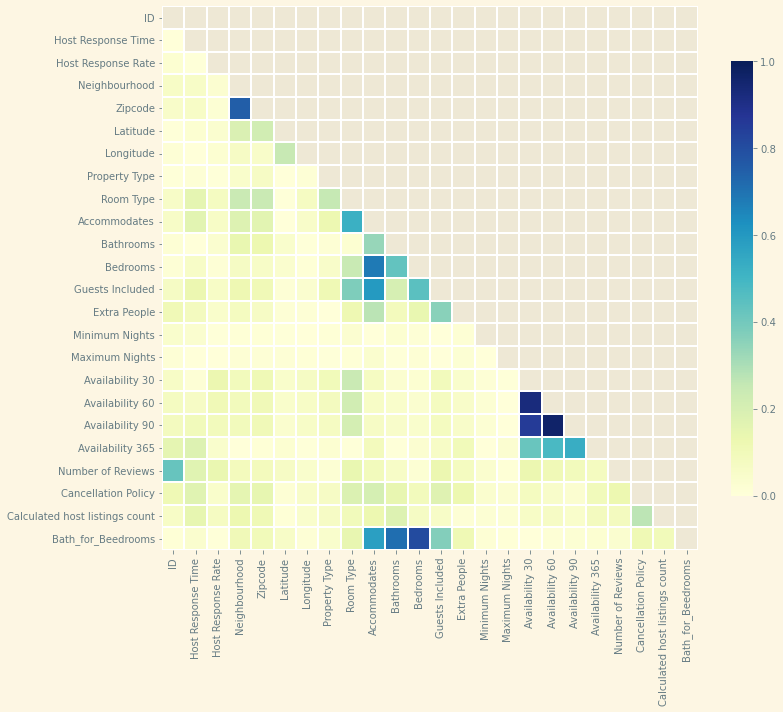

In [46]:
# Compute the correlation matrix
corr = np.abs(df_train.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

* La disponibilidades a diferentes rangos están muy correladas, por tanto nos vamos a quedar unicamente con la disponibilidad a 30 días.

In [47]:
df_train.drop(['Availability 60', 'Availability 90', 'Availability 365'], axis=1, inplace=True)

## Outliers en Price.

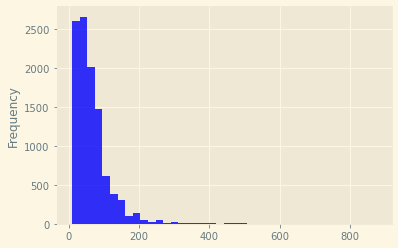

In [48]:
df_train["Price"].plot.hist(alpha = 0.8, color = "blue", bins = 40, grid = True)
plt.show()

In [49]:
len(df_train[df_train["Price"] > 350])

59

* Hay 59 filas con precios mayores de 350 € que es aproximadamente un 0,5 % del dataset, por tanto vamos a considerarlos outliers y vamos a eliminarlos.

In [50]:
df_train.drop(df_train[df_train['Price']>350].index, inplace = True)
df_train.shape

(10475, 23)

* Pasamos los precios en escala logarítmica para obtener una distribución mas gausiana.

In [51]:
df_train['Price'] = np.log10(df_train['Price'])

* Histograma de todas las variables para ver su distribución.

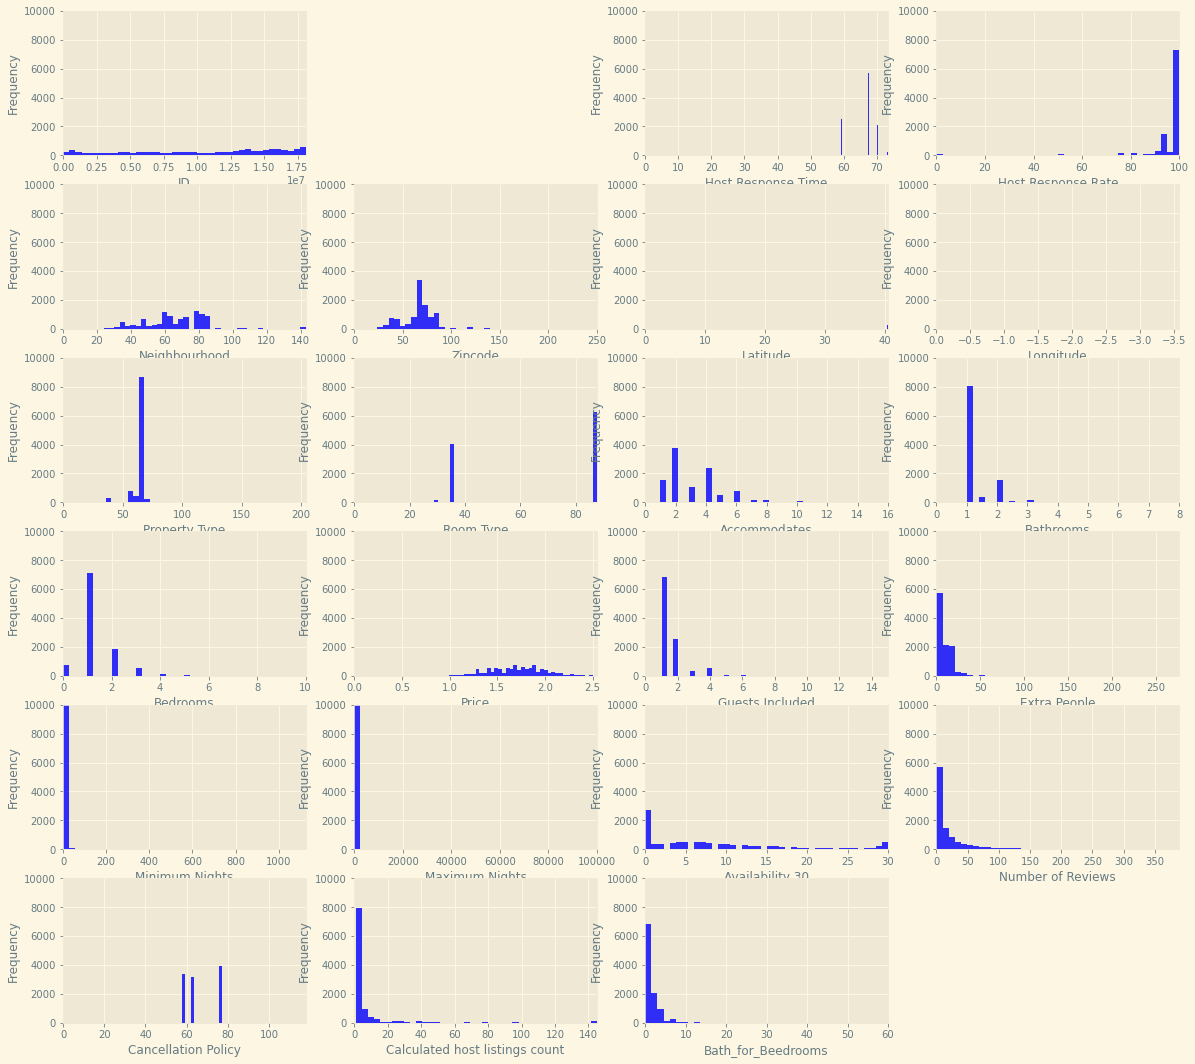

In [52]:
plt.figure(figsize=(20, 25))

for i, c in enumerate(df_train.columns):
    if(c != 'Picture Url'):
      plt.subplot(8, 4, i + 1)
      df_train[c].plot.hist(alpha = 0.8, color = "blue", bins = 40, grid = True)
      plt.axis([0, np.max(df_train[c]), 0, 10000])
      plt.xlabel(c)

plt.show()

* Podemos ver como las columnas Minimum Nights y Maximum Nights no aportan información al estar todas prácticamente en un mismo valor.

In [53]:
df_train.drop(['Minimum Nights', 'Maximum Nights'], axis=1, inplace=True)
len(df_train.columns)

21

* Aún nos quedan 21 columnas.
* Tendremos que seguir analizando para reducir la dimensionalidad.
* Organizamos las columnas de train para poder dividir entre características y variable objetivo.

In [54]:
df_train.columns

Index(['ID', 'Picture Url', 'Host Response Time', 'Host Response Rate',
       'Neighbourhood', 'Zipcode', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Price',
       'Guests Included', 'Extra People', 'Availability 30',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Bath_for_Beedrooms'],
      dtype='object')

* Movemos la columna Price a la primera posición

In [55]:
df_train = df_train[['Price', 'ID', 'Picture Url', 'Host Response Time', 'Host Response Rate', 
       'Neighbourhood', 'Zipcode', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',       
       'Guests Included', 'Extra People', 'Availability 30',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Bath_for_Beedrooms']]
df_train.head()

,Price,ID,Picture Url,Host Response Time,Host Response Rate,Neighbourhood,Zipcode,Latitude,Longitude,Property Type,...,Accommodates,Bathrooms,Bedrooms,Guests Included,Extra People,Availability 30,Number of Reviews,Cancellation Policy,Calculated host listings count,Bath_for_Beedrooms
0,1.544068,17266729,https://public.opendatasoft.com/api/v2/catalog...,67.680260,100.000000,45.454545,34.808511,40.402892,-3.631473,68.134298,...,2,1.0,1.0,1,0,29,0,57.695333,1,1.0
1,1.255273,11705453,https://public.opendatasoft.com/api/v2/catalog...,59.115899,94.885067,58.769573,68.476543,40.413236,-3.704446,54.205882,...,3,0.0,1.0,1,0,0,0,57.695333,1,0.0
2,1.556303,12085078,https://public.opendatasoft.com/api/v2/catalog...,67.680260,80.000000,72.120846,68.476543,40.409787,-3.708065,68.134298,...,2,1.0,1.0,1,10,0,10,57.695333,1,1.0
3,1.778151,15669581,https://public.opendatasoft.com/api/v2/catalog...,67.680260,100.000000,62.270349,75.945869,40.421165,-3.701844,68.134298,...,4,1.0,1.0,2,15,4,7,57.695333,8,1.0
4,1.176091,17677054,https://public.opendatasoft.com/api/v2/catalog...,67.680260,100.000000,42.695652,34.825000,40.427572,-3.626478,62.124555,...,1,1.0,1.0,1,5,23,2,57.695333,2,1.0


In [56]:
data = df_train.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data[:,3:]      # nos quedamos con el resto excepto 'ID' y 'Picture Url'
feature_names = df_train.columns[3:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

## Decision Tree.

best parameters: {'max_depth': 7}


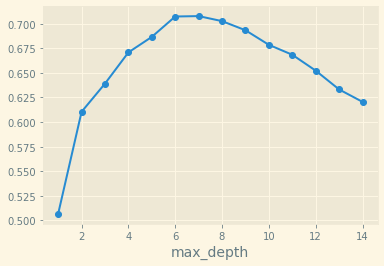

In [57]:
max_depth = range(1,15)
parameters = {'max_depth': max_depth}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid=parameters, cv=5)
grid.fit(XtrainScaled, y_train)

print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth, scores, '-o')
plt.xlabel('max_depth', fontsize=14)
plt.show()

In [58]:
max_depth_opt = grid.best_params_['max_depth']

reg_tree = DecisionTreeRegressor(max_depth=max_depth_opt).fit(XtrainScaled, y_train)

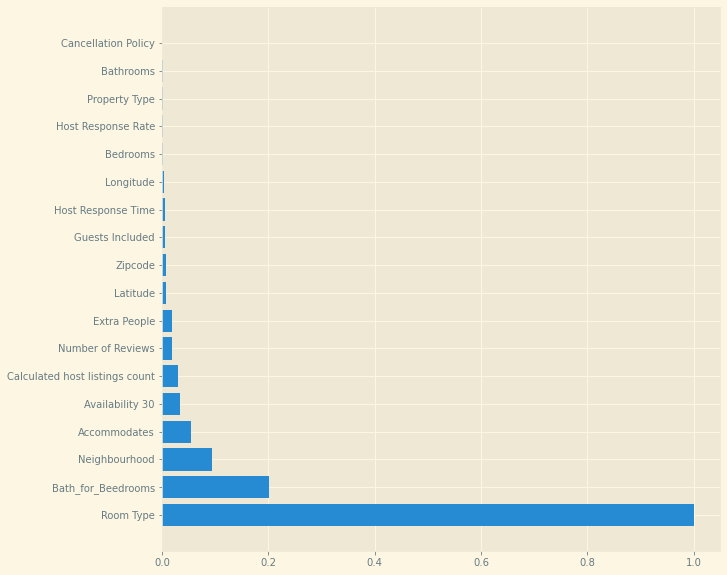

In [59]:
importances = reg_tree.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

## Random Forest.

best mean cross-validation score: 0.780
best parameters: {'max_depth': 19}


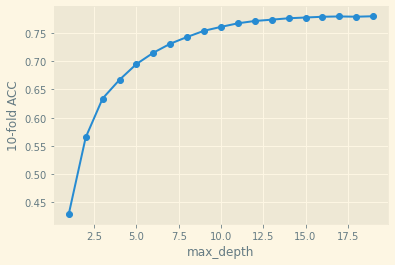

In [60]:
maxDepth = range(1,20)
parameters = {'max_depth': maxDepth}
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=parameters, cv=5) 
grid.fit(XtrainScaled, y_train.ravel())


print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

* La mejor profundidad que nos da es 19, pero creo que desde 12 la mejora es mínima y así hacemos el modelo mas sencillo

In [61]:
model = RandomForestRegressor(max_depth=12,n_estimators=200,max_features='sqrt').fit(X_train,y_train.ravel())

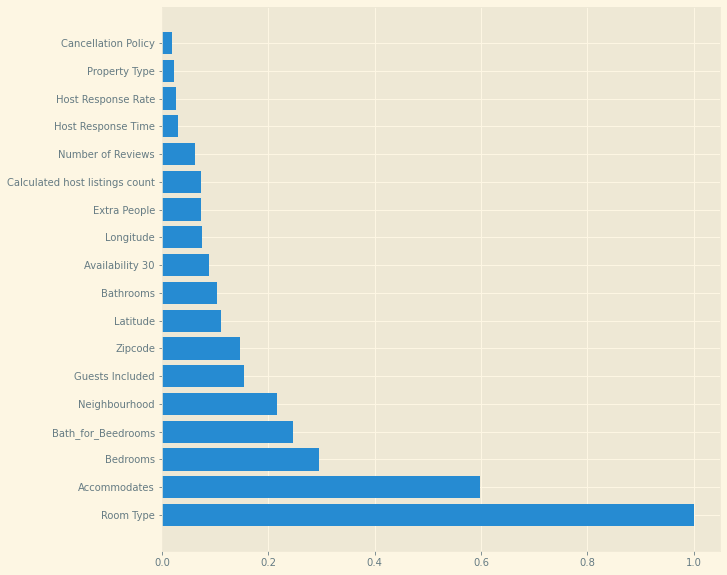

In [62]:
importances = model.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

* Hay variables que no tienen apenas peso para el modelo.
* Prescindimos de las siguientes variables:

In [63]:
df_train.drop(['Cancellation Policy', 'Property Type', 'Host Response Rate', 'Host Response Time', 'Number of Reviews', 'Extra People', 'Calculated host listings count', 'Longitude'], 
    axis=1, inplace=True)

In [64]:
df_train.columns

Index(['Price', 'ID', 'Picture Url', 'Neighbourhood', 'Zipcode', 'Latitude',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Guests Included',
       'Availability 30', 'Bath_for_Beedrooms'],
      dtype='object')

Si se ejecuta la linea comentada en la siguiente celda, luego habria que volver a descargar las imágenes

In [65]:
#df_train.to_csv('../2.Modelado_sin_Imagenes/Data/train_cleaned.csv', index=id, header=True) 
!rm 'Data/train.csv'

## 1.2 - Transformaciones para test

In [66]:
df_test = pd.read_csv('Data/test.csv', sep=';', decimal='.')

df_test.drop([
    'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description', 
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 
    'House Rules', 'Thumbnail Url', 'Medium Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Acceptance Rate', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Listings Count', 
    'Host Total Listings Count', 'Host Verifications', 'Street', 'Neighbourhood Group Cleansed', 'State', 'Market',
    'Smart Location', 'Country Code', 'Country', 'Beds', 'Bed Type', 'Amenities', 'Calendar Updated', 'Has Availability', 
    'Calendar last Scraped','First Review', 'Last Review', 'Review Scores Rating', 'Review Scores Accuracy',
    'Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 
    'Review Scores Location', 'Review Scores Value', 'License', 'Jurisdiction Names',
    'Reviews per Month', 'Geolocation', 'Features' 
    ], 
    axis=1, inplace=True)

df_test['Price'] = np.log10(df_test['Price'])
df_test['Neighbourhood'] = df_test['Neighbourhood'].fillna(df_test['Neighbourhood Cleansed'])
df_test.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)
df_test = df_test[df_test['City'] == "Madrid"]
df_test.drop(['City'], axis=1, inplace=True)
df_test.drop(['Square Feet', 'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee'], 
             axis=1, inplace=True)
df_test['Bathrooms'] = df_test['Bathrooms'].fillna(value=1)
df_test.drop(df_test[df_test['Bedrooms'].isnull()].index, inplace = True)
df_test.drop(df_test[df_test['Price'].isnull()].index, inplace = True)
df_test["Host Response Rate"].fillna(mean_host_resp, inplace=True)
df_test['Zipcode'] = df_test['Zipcode'].fillna('unknown')
df_test['Host Response Time'] = df_test['Host Response Time'].fillna('unknown')
df_test.drop(['Availability 60', 'Availability 90', 'Availability 365'], axis=1, inplace=True)
df_test['Bath_for_Beedrooms'] = df_test['Bedrooms'] * df_test['Bathrooms']
df_test.drop(df_train[df_train['Price']>350].index, inplace = True)
df_test.drop(['Minimum Nights', 'Maximum Nights'], axis=1, inplace=True)
columns = ['Price', 'ID', 'Picture Url', 'Host Response Time', 'Host Response Rate', 
       'Neighbourhood', 'Zipcode', 'Latitude', 'Longitude', 'Property Type',
       'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',       
       'Guests Included', 'Extra People', 'Availability 30',
       'Number of Reviews', 'Cancellation Policy',
       'Calculated host listings count', 'Bath_for_Beedrooms']
df_test = df_test[columns]
df_test.drop([
    'Cancellation Policy', 'Property Type', 'Host Response Rate',
    'Host Response Time', 'Number of Reviews', 'Extra People', 
    'Calculated host listings count', 'Longitude'], 
    axis=1, inplace=True)

categorical_feature_mask = df_test.dtypes==object
categorical_cols = df_test.columns[categorical_feature_mask].tolist()
categorical_cols = categorical_cols[1:]
for c in categorical_cols:
    df_test[c] = df_test[c].map(mean_map[c])

In [67]:
df_test.isnull().any()

Price                 False
ID                    False
Picture Url            True
Neighbourhood         False
Zipcode                True
Latitude              False
Room Type             False
Accommodates          False
Bathrooms             False
Bedrooms              False
Guests Included       False
Availability 30       False
Bath_for_Beedrooms    False
dtype: bool

In [68]:
df_test['Zipcode'].isnull().sum()

4

* En el dataset de test tenemos 4 registros con NA debido al codificado de variables, como es una cantidad insignificante vamos a eliminar esos registros.

In [69]:
df_test.drop(df_test[df_test['Zipcode'].isnull()].index, inplace = True)

In [70]:
#df_test.to_csv('../2.Modelado_sin_Imagenes/Data/test_cleaned.csv', index=id, header=True)
!rm 'Data/test.csv'